In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import warnings
warnings.filterwarnings("ignore")

In [2]:
# datset_path='path' and use change open? to uc?export-download
# suppose we have link on our drive

In [3]:
df=pd.read_csv(r"C:\Users\ANIL\Desktop\4Achiever\p\Data Set\House Price Advance Regresssion\test.csv")

In [4]:
df.shape

(1459, 80)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [8]:
missing_value_per=df.isnull().sum()/df.shape[0] *100
missing_value_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

In [9]:
missing_value_cln_15=missing_value_per[missing_value_per>15].keys()
missing_value_cln_15

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
df2_drop_clm=df.drop(columns=missing_value_cln_15)
df2_drop_clm.shape

(1459, 74)

# First We select numerical data

In [11]:
df3_num=df2_drop_clm.select_dtypes(include=['int64','float64'])
df3_num

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


# check whether there is missing value in numerical data

<AxesSubplot:>

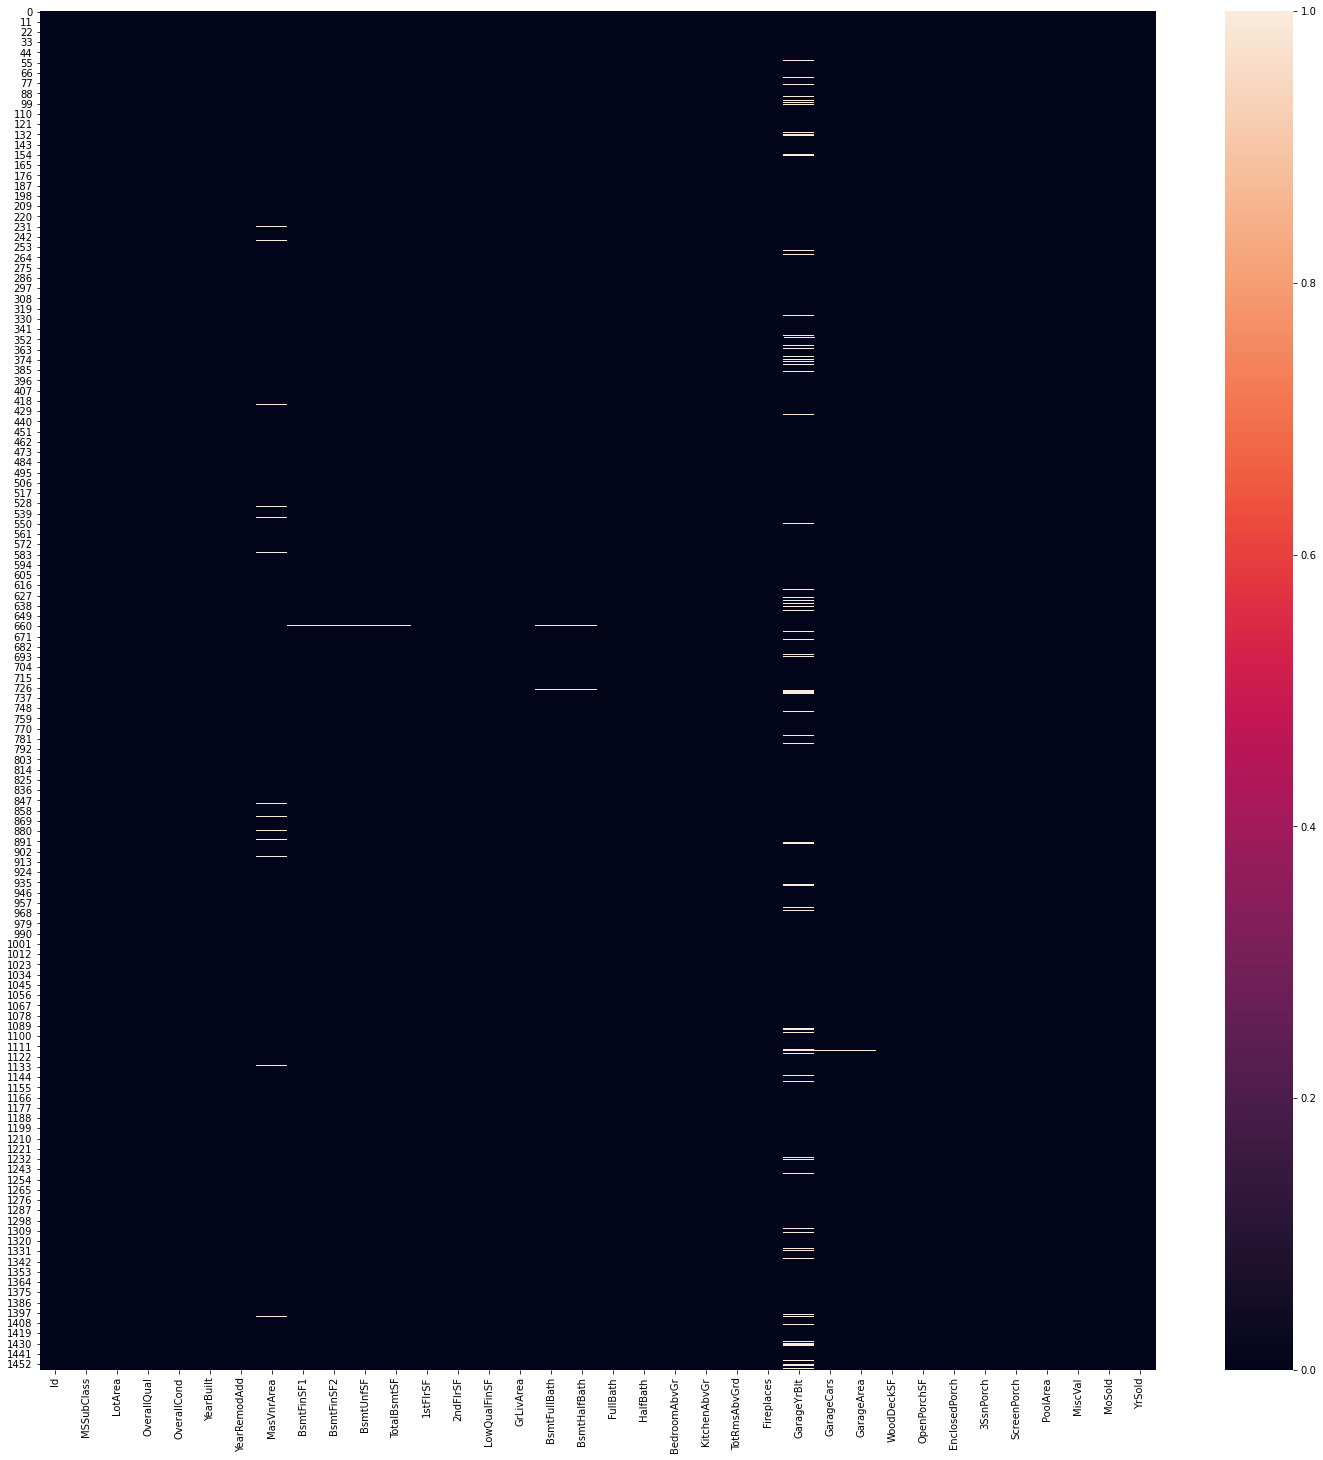

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_num.isnull())

In [13]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [14]:
df3_num[df3_num.isnull().any(axis=1)].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
53,1514,90,13260,5,6,1962,2001,144.0,1500.0,0.0,228.0,1728.0,1728,0,0,1728,2.0,0.0,2,0,6,2,10,0,NaN,0.0,0.0,0,0,0,0,0,0,0,1,2010
71,1532,30,4485,5,7,1920,1950,0.0,579.0,0.0,357.0,936.0,936,0,0,936,1.0,0.0,1,0,2,1,5,1,NaN,0.0,0.0,51,0,135,0,0,0,0,5,2010
79,1540,190,9045,5,3,1910,1950,0.0,0.0,0.0,840.0,840.0,1128,1128,0,2256,0.0,0.0,2,0,4,2,12,0,NaN,0.0,0.0,0,18,18,0,0,0,0,6,2010
92,1553,70,12900,6,8,1912,2009,0.0,0.0,0.0,780.0,780.0,780,780,0,1560,0.0,0.0,1,1,3,1,7,0,NaN,0.0,0.0,344,0,0,0,168,0,0,5,2010
96,1557,190,9900,5,4,1915,1950,0.0,1026.0,0.0,186.0,1212.0,1212,180,0,1392,1.0,0.0,1,0,3,1,6,0,NaN,0.0,0.0,0,0,168,0,0,0,0,2,2010


In [15]:
df3_num.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      78
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [16]:
missing_num_var=[var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

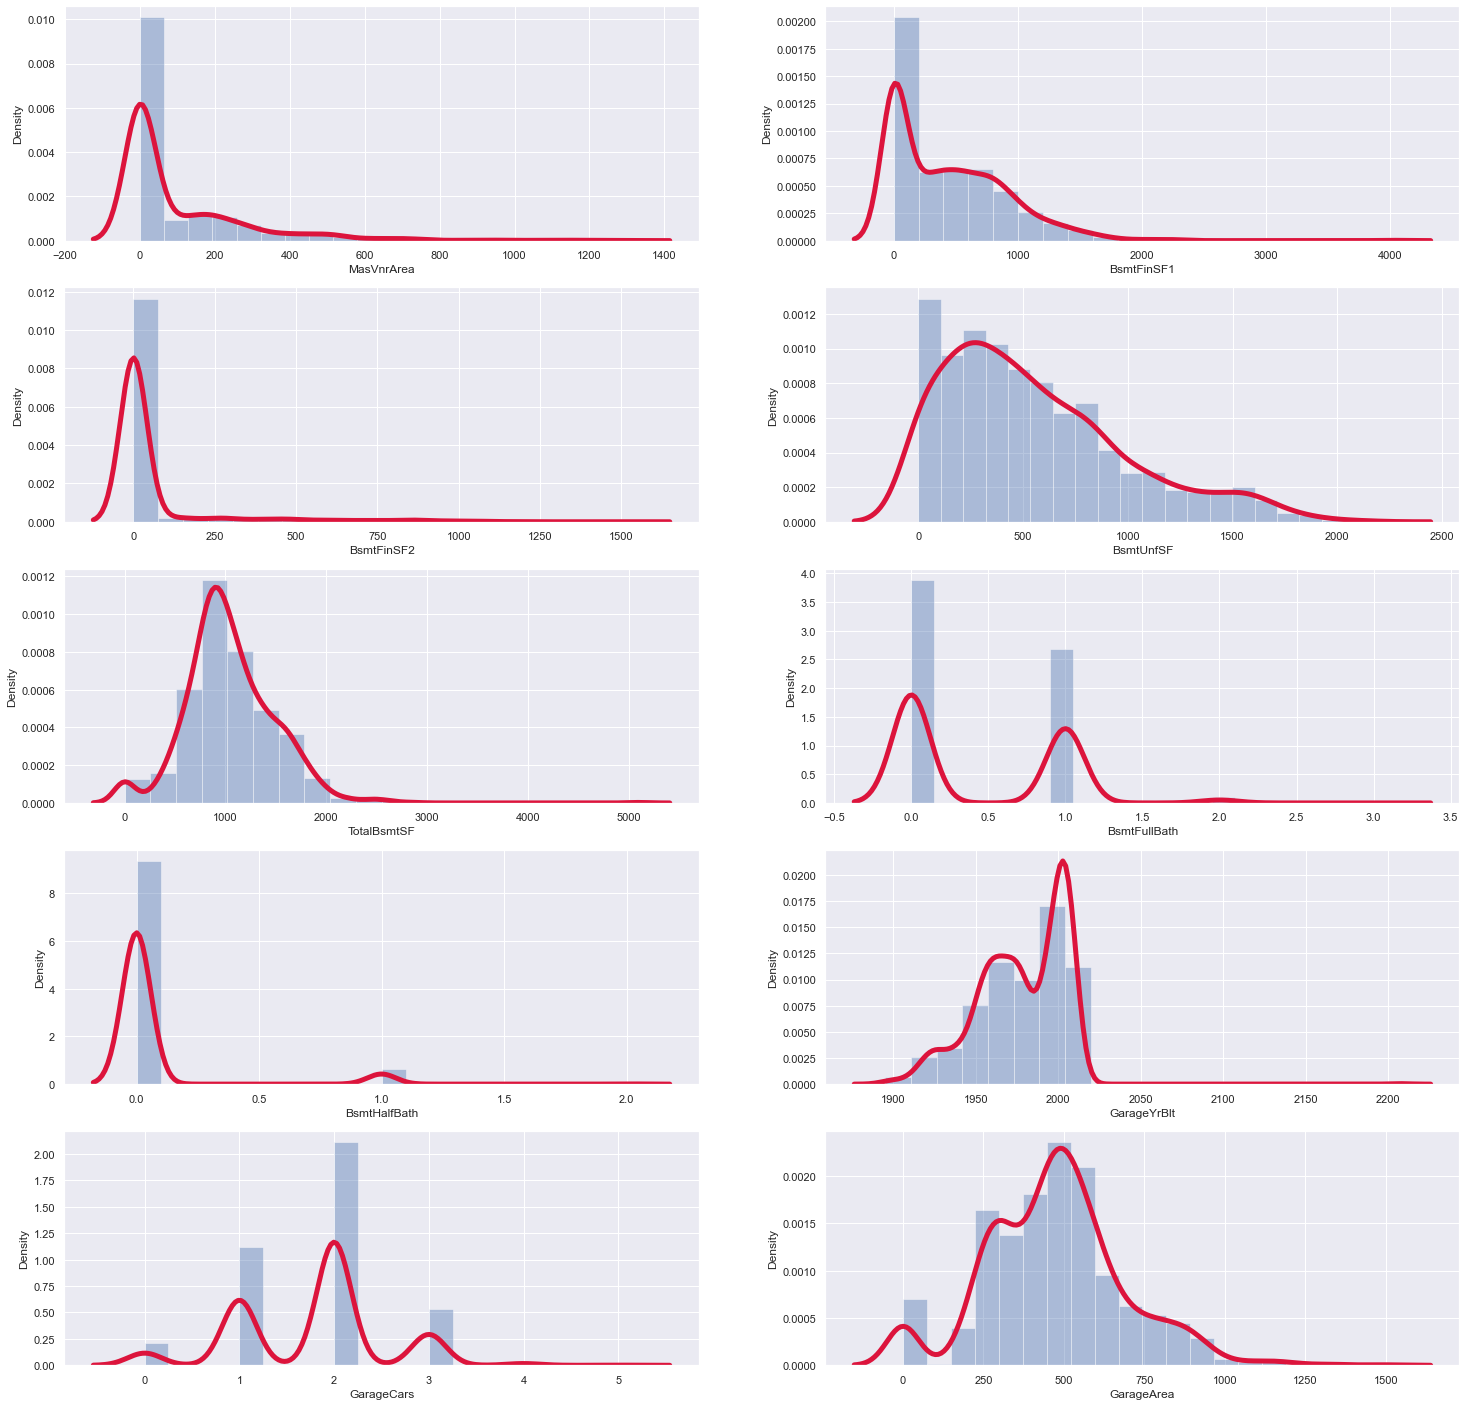

In [17]:
plt.figure(figsize=(25,25))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(5,2,i+1)
    sns.distplot(df3_num[var],bins=20,kde_kws={'linewidth':5,'color':'#DC143C'})

In [18]:
df4_num_mean = df3_num.fillna(df3_num.mean())
df4_num_mean.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

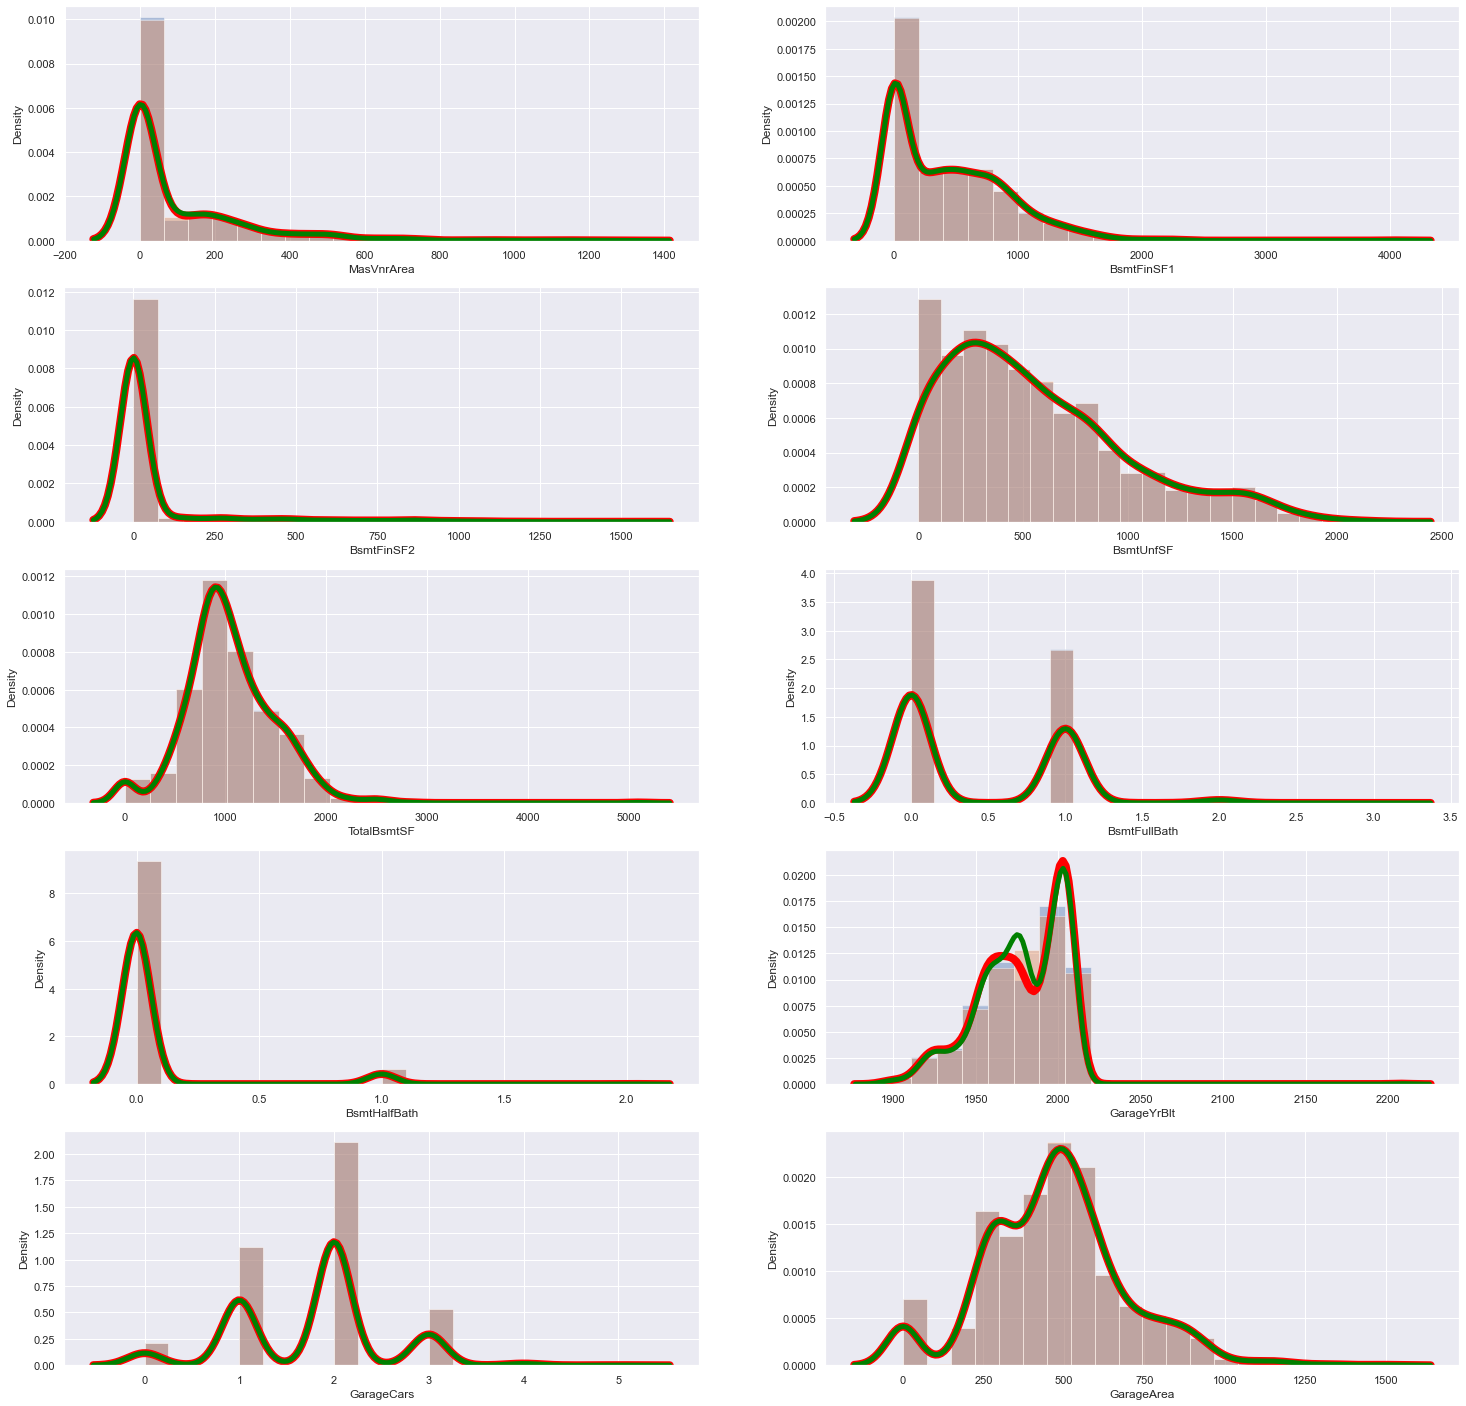

In [19]:
plt.figure(figsize=(25,25))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(5,2,i+1)
    sns.distplot(df3_num[var],bins=20,kde_kws={'linewidth':8,'color':'red'},label='Originial')
    sns.distplot(df4_num_mean[var],bins=20,kde_kws={'linewidth':5,'color':'green'},label='Mean')

In [20]:
df5_num_median = df3_num.fillna(df3_num.mean())
df5_num_median.isnull().sum().sum()

0

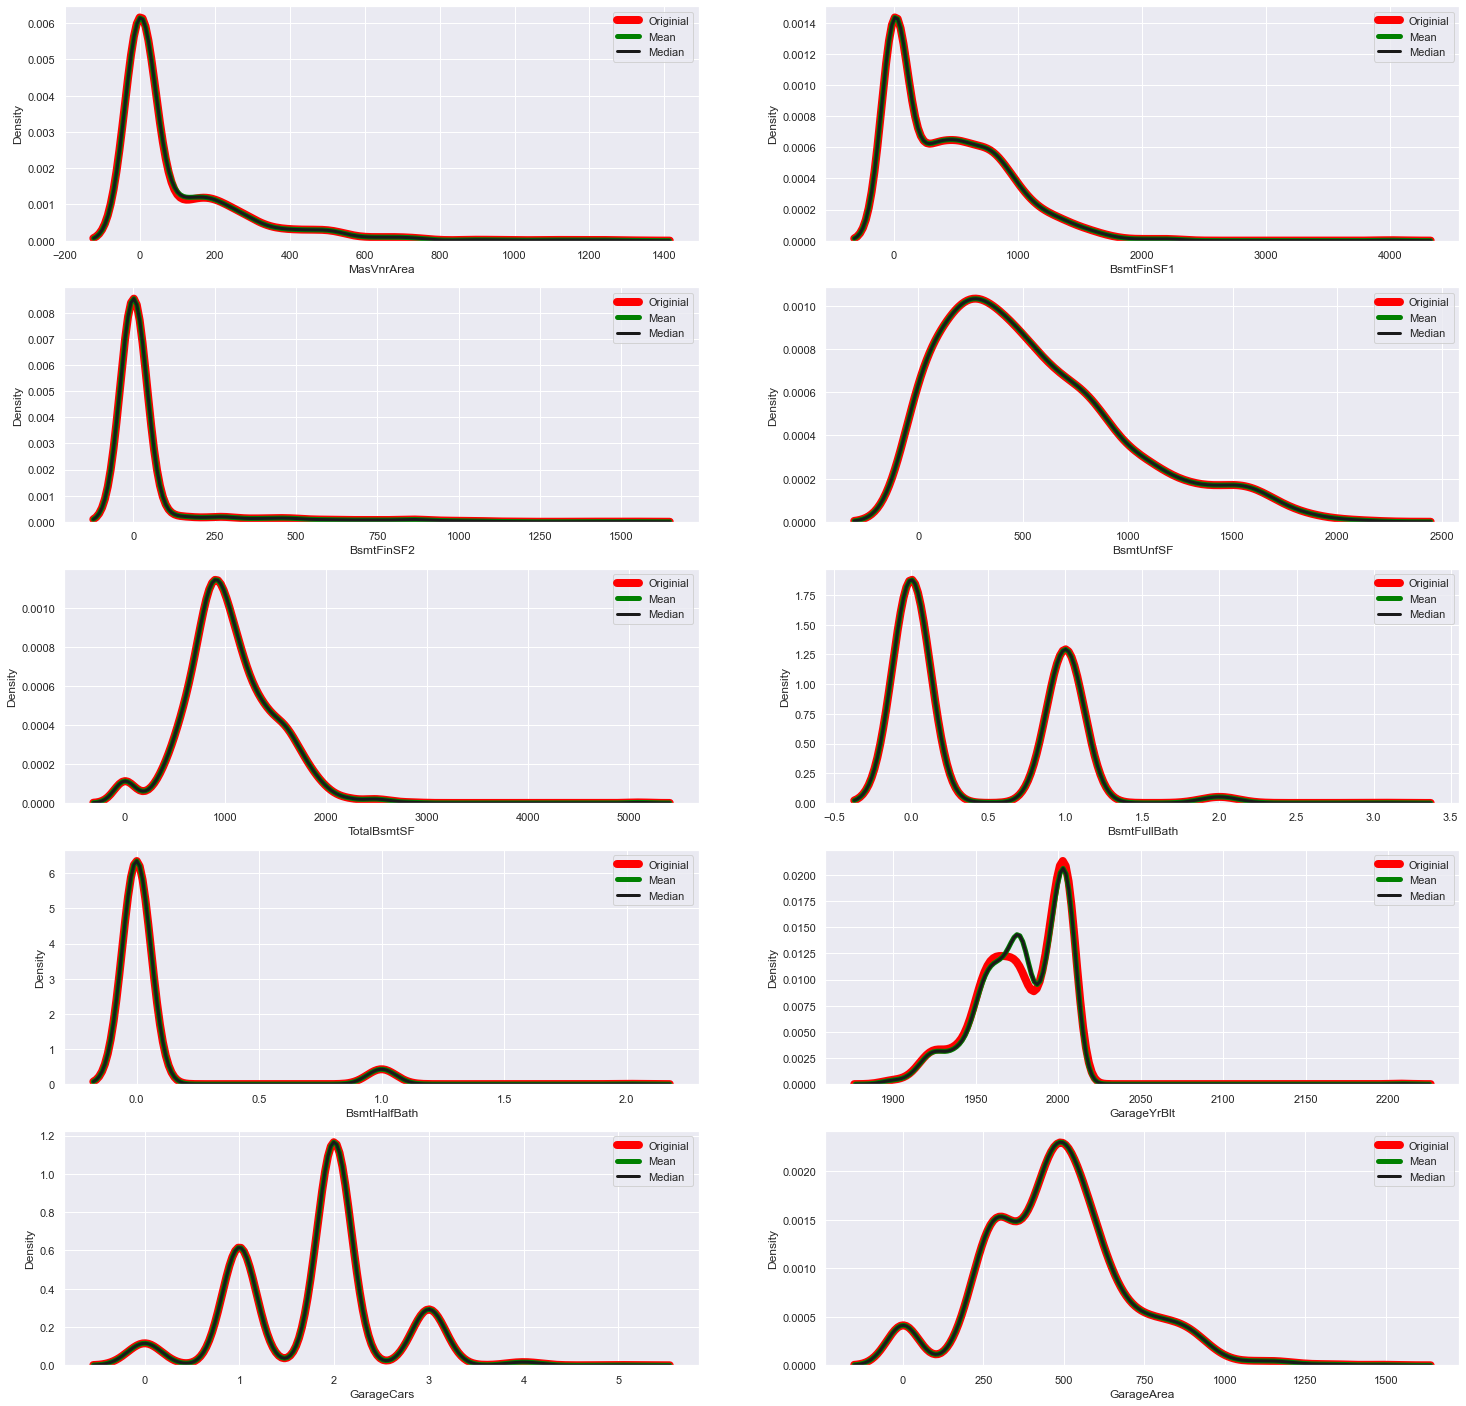

In [21]:
plt.figure(figsize=(25,25))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(5,2,i+1)
    sns.distplot(df3_num[var],hist=False,bins=20,kde_kws={'linewidth':8,'color':'red'},label='Originial')
    sns.distplot(df4_num_mean[var],hist=False,bins=20,kde_kws={'linewidth':5,'color':'green'},label='Mean')
    sns.distplot(df5_num_median[var],hist=False,bins=20,kde_kws={'linewidth':3,'color':'k'},label='Median')
    plt.legend()

In [22]:
df_concat=pd.concat([df3_num[missing_num_var],df4_num_mean[missing_num_var],df5_num_median[missing_num_var]])
df_concat


,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,0.000000,468.000000,144.000000,270.000000,882.00000,0.000000,0.000000,1961.000000,1.000000,730.000000
1,108.000000,923.000000,0.000000,406.000000,1329.00000,0.000000,0.000000,1958.000000,1.000000,312.000000
2,0.000000,791.000000,0.000000,137.000000,928.00000,0.000000,0.000000,1997.000000,2.000000,482.000000
3,20.000000,602.000000,0.000000,324.000000,926.00000,0.000000,0.000000,1998.000000,2.000000,470.000000
4,0.000000,263.000000,0.000000,1017.000000,1280.00000,0.000000,0.000000,1992.000000,2.000000,506.000000
5,0.000000,0.000000,0.000000,763.000000,763.00000,0.000000,0.000000,1993.000000,2.000000,440.000000
6,0.000000,935.000000,0.000000,233.000000,1168.00000,1.000000,0.000000,1992.000000,2.000000,420.000000
7,0.000000,0.000000,0.000000,789.000000,789.00000,0.000000,0.000000,1998.000000,2.000000,393.000000
8,0.000000,637.000000,0.000000,663.000000,1300.00000,1.000000,0.000000,1990.000000,2.000000,506.000000
9,0.000000,804.000000,78.000000,0.000000,882.00000,1.000000,0.000000,1970.000000,2.000000,525.000000


In [23]:
pd.set_option('display.max_columns',None)


In [24]:
df_concat[df_concat.isnull().any(axis=1)]

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
53,144.0,1500.0,0.0,228.0,1728.0,2.0,0.0,NaN,0.0,0.0
71,0.0,579.0,0.0,357.0,936.0,1.0,0.0,NaN,0.0,0.0
79,0.0,0.0,0.0,840.0,840.0,0.0,0.0,NaN,0.0,0.0
92,0.0,0.0,0.0,780.0,780.0,0.0,0.0,NaN,0.0,0.0
96,0.0,1026.0,0.0,186.0,1212.0,1.0,0.0,NaN,0.0,0.0
98,0.0,73.0,0.0,634.0,707.0,0.0,0.0,NaN,0.0,0.0
100,72.0,704.0,0.0,1128.0,1832.0,2.0,0.0,NaN,0.0,0.0
130,0.0,0.0,0.0,960.0,960.0,0.0,0.0,NaN,0.0,0.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
134,0.0,0.0,0.0,894.0,894.0,1.0,0.0,NaN,0.0,0.0
